In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import RFE
from wrangle import wrangle_data
from prepare import prepare_zillow_mvp
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = prepare_zillow_mvp()

In [3]:
model_1_data = df.drop(columns='more_than_two_bath')
model_2_data = df[['more_than_two_bath','taxvaluedollarcnt']]
model_3_data = df[['calculatedfinishedsquarefeet', 'more_than_two_bath', 'taxvaluedollarcnt']]

#  Model 1 Data
---
Features: bathroomcnt_scaled, bedroomcnt_scaled, calculatedfinishedsquarefeet_scaled 

In [4]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle_data(model_1_data, 'taxvaluedollarcnt', modeling=True)

In [5]:
X_train

,bathroomcnt_scaled,bedroomcnt_scaled,calculatedfinishedsquarefeet_scaled
11869,0.1,0.250000,0.062547
2322,0.1,0.333333,0.085209
1154,0.1,0.250000,0.050612
9048,0.3,0.416667,0.244750
11513,0.1,0.250000,0.082490
...,...,...,...
14845,0.1,0.250000,0.094954
15349,0.1,0.250000,0.081885
18143,0.1,0.333333,0.119882
21369,0.1,0.250000,0.067004


In [6]:
df_model_evals = pd.DataFrame()

df_model_evals['y'] = y_train
df_model_evals['baseline_yhat'] = y_train.mean()

rmse_poly = sqrt(mean_squared_error(df_model_evals.y, df_model_evals.baseline_yhat))
rsquared_poly = explained_variance_score(y_train, df_model_evals.baseline_yhat)

print("Baseline Model")
print('-' * 24)
print(f"Basline Model RMSE: {rmse_poly:.2f}")
print(f"Basline R^2: {rsquared_poly:.2%}")

Baseline Model
------------------------
Basline Model RMSE: 696954.15
Basline R^2: 0.00%


In [7]:
df_model_evals.head()

,y,baseline_yhat
11869,440000.0,533975.535119
2322,515351.0,533975.535119
1154,186555.0,533975.535119
9048,344419.0,533975.535119
11513,285000.0,533975.535119


In [8]:
# Create a polynomial linear regression
poly = PolynomialFeatures(3)

X_train_poly = poly.fit_transform(X_train)
X_validate_poly = poly.transform(X_validate)
X_test_poly = poly.transform(X_test)

lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)

yhat_poly_train = lm_poly.predict(X_train_poly)
poly_train_residuals = yhat_poly_train - y_train

df_model_evals['poly_1_yhat'] = lm_poly.predict(X_train_poly)

rmse_poly = sqrt(mean_squared_error(y_train, yhat_poly_train))
rsquared_poly = explained_variance_score(y_train, yhat_poly_train)

print("Train Set\nPolynomial : degree=3")
print('-' * 24)
print(f"Polynomial Model RMSE: {rmse_poly:.2f}")
print(f"Polynomial R^2: {rsquared_poly:.2%}")

Train Set
Polynomial : degree=3
------------------------
Polynomial Model RMSE: 496475.92
Polynomial R^2: 49.26%


In [9]:
df_model_evals.head()

,y,baseline_yhat,poly_1_yhat
11869,440000.0,533975.535119,2.464330e+05
2322,515351.0,533975.535119,3.251491e+05
1154,186555.0,533975.535119,2.103057e+05
9048,344419.0,533975.535119,1.011003e+06
11513,285000.0,533975.535119,3.194263e+05


In [10]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [11]:
yhat_linear_regression = lm.predict(X_train)

In [12]:
residuals = yhat_linear_regression - y_train

rmse_poly = sqrt(mean_squared_error(y_train, yhat_linear_regression))
rsquared_poly = explained_variance_score(y_train, yhat_linear_regression)

print("Train Set\nLinear Regression")
print('-' * 24)
print(f"Linear Regression Model RMSE: {rmse_poly:.2f}")
print(f"Linear Regression R^2: {rsquared_poly:.2%}")

Train Set
Linear Regression
------------------------
Linear Regression Model RMSE: 544038.04
Linear Regression R^2: 39.07%


#  Model 2 Data
---
Features:

In [13]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle_data(model_2_data, 'taxvaluedollarcnt', modeling=True)

In [14]:
# Create a polynomial linear regression
poly = PolynomialFeatures(7)

X_train_poly = poly.fit_transform(X_train)
X_validate_poly = poly.transform(X_validate)
X_test_poly = poly.transform(X_test)

In [15]:
lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)

yhat_poly_train = lm_poly.predict(X_train_poly)
poly_train_residuals = yhat_poly_train - y_train

rmse_poly = sqrt(mean_squared_error(y_train, yhat_poly_train))
rsquared_poly = explained_variance_score(y_train, yhat_poly_train)

print("Train Set\nPolynomial : degree=2")
print('-' * 24)
print(f"Polynomial Model RMSE: {rmse_poly:.2f}")
print(f"Polynomial R^2: {rsquared_poly:.2%}")

Train Set
Polynomial : degree=2
------------------------
Polynomial Model RMSE: 657864.76
Polynomial R^2: 10.90%


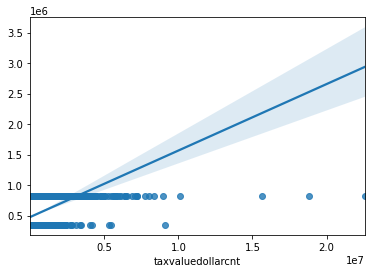

In [16]:
sns.regplot(y_train, yhat_poly_train);

In [17]:
lm = LinearRegression()
lm.fit(X_train, y_train)

yhat_linear_regression = lm.predict(X_train)

residuals = yhat_linear_regression - y_train

rmse_poly = sqrt(mean_squared_error(y_train, yhat_linear_regression))
rsquared_poly = explained_variance_score(y_train, yhat_linear_regression)

print("Train Set\nLinear Regression")
print('-' * 24)
print(f"Linear Regression Model RMSE: {rmse_poly:.2f}")
print(f"Linear Regression R^2: {rsquared_poly:.2%}")

Train Set
Linear Regression
------------------------
Linear Regression Model RMSE: 657864.76
Linear Regression R^2: 10.90%


In [18]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle_data(model_3_data, 'taxvaluedollarcnt', modeling=True)

In [19]:
X_train.head()

,calculatedfinishedsquarefeet_scaled,more_than_two_bath_scaled
11869,0.062547,0.0
2322,0.085209,0.0
1154,0.050612,0.0
9048,0.244750,1.0
11513,0.082490,0.0


In [20]:
# Create a polynomial linear regression
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_validate_poly = poly.transform(X_validate)
X_test_poly = poly.transform(X_test)

lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)

yhat_poly_train = lm_poly.predict(X_train_poly)
poly_train_residuals = yhat_poly_train - y_train

rmse_poly = sqrt(mean_squared_error(y_train, yhat_poly_train))
rsquared_poly = explained_variance_score(y_train, yhat_poly_train)

print("Train Set\nPolynomial : degree=2")
print('-' * 24)
print(f"Polynomial Model RMSE: {rmse_poly:.2f}")
print(f"Polynomial R^2: {rsquared_poly:.2%}")

Train Set
Polynomial : degree=2
------------------------
Polynomial Model RMSE: 532516.09
Polynomial R^2: 41.62%


In [21]:
# from sklearn.linear_model import LogisticRegressionCV

In [22]:
# logreg = LinearRegression()
# logreg.fit(X_train, y_train)

# yhat_log_train = logreg.predict(X_train_poly)
# train_log_residuals = yhat_log_train - y_train

# rmse_poly = sqrt(mean_squared_error(y_train, yhat))
# rsquared_poly = explained_variance_score(y_train, yhat)

# print("Train Set\nPolynomial : degree=3")
# print('-' * 24)
# print(f"Polynomial Model RMSE: {rmse_poly:.2f}")
# print(f"Polynomial R^2: {rsquared_poly:.2%}")

##  Validate

yhat_poly_train = lm_poly.predict(X_)